In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [9]:
df=sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


# Part 5. 데이터 사전처리

## 1. 누락 데이터 처리

#### 누락 데이터 확인
- isnull() 누락 데이터면 True, 유효한 데이터가 존재하면 False를 반환 : # print(df.head().isnull())
- notnull() 유효한 데이터가 존재하면 True, 누락 데이터면 False를 반환 : # print(df.head().notnull())

In [4]:
# ['deck']열의 누락 데이터 갯수 확인
nan_deck=df['deck'].value_counts(dropna=False) # dropna=True > 유효한 데이터의 갯수
nan_deck

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

In [5]:
# 20행 까지의 NaN Data 갯수 구하기 : isnull() T:1 F:0
df.head(20).isnull().sum(axis=0)

survived        0
pclass          0
sex             0
age             3
sibsp           0
parch           0
fare            0
embarked        0
class           0
who             0
adult_male      0
deck           15
embark_town     0
alive           0
alone           0
dtype: int64

#### 누락 데이터 제거 (dropna : drop missing values)
- DataFrame.dropna(self, axis=0, how='any', thresh=None, subset=None, inplace=False)
[https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html?highlight=dropna#pandas.DataFrame.dropna]
- 각 열의 NaN data 갯수 파악
- NaN data가 500개 이상인 columns 제거
- NaN data가 있는 행을 제거

In [6]:
# dataset 각 열의 NaN data 갯수 파악

# dataset 내의 다른 변수들에 비해 'deck'열의 NaN 비중이 높기 때문에 전체 분석에서 제외하는것이 좋다. 
missing_df=df.isnull() # isnull() - 참 1, 거짓 0
for col in missing_df.columns: 
    missing_count=missing_df[col].value_counts()
    try:
        print(col, ': ',missing_count[True]) 
    except:
        print(col, ': ',0)

survived :  0
pclass :  0
sex :  0
age :  177
sibsp :  0
parch :  0
fare :  0
embarked :  2
class :  0
who :  0
adult_male :  0
deck :  688
embark_town :  2
alive :  0
alone :  0


In [7]:
# NaN값이 500개 이상인 열을 삭제 - ['deck']
df_thresh=df.dropna(axis=1, thresh=500) # thresh : 임계치 > 파인튜닝
df_thresh.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [8]:
# age열에 나이 데이터가 없는 모든 행 삭제
    #‘any’ : If any NA values are present, drop that row or column.
    #‘all’ : If all values are NA, drop that row or column

df_age=df.dropna(subset=['age'],how='any',axis=0)
len(df_age)

714

#### 누락 데이터 치환
DataFrame.fillna(self, value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs**)
[https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html?highlight=fillna#pandas.DataFrame.fillna]
- 평균 값으로 NaN데이터 치환
- 가장 많이 나타나는 값으로 바꾸기
- 이웃하고 있는 값으로 바꾸기

In [6]:
df_age1=sns.load_dataset('titanic')

In [10]:
#  나이값 평균 구하기 + 치환 이전 age데이터 출력 (#5)
mean_age=df['age'].mean(axis=0)
df['age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [11]:
# 치환된 Nan값 + 치환 이후 age data 출력 (#5)
df['age'].fillna(mean_age,inplace=True)
df['age'].head(10)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64

In [12]:
# 가장 많이 나타나는 값으로 바꾸기

# 1) embark_town열 825~830행 출력 (전처리)
print(df['embark_town'][825:830],'\n')

# 2) embark_town열의 NaN값을 승선도시 중 가장 빈도가 많은 값으로 치환
most_freq=df['embark_town'].value_counts(dropna=True).idxmax()
print(most_freq,'\n')
df['embark_town'].fillna(most_freq, inplace=True)

# 3) embark_town열 825~830행 출력 (전처리 종료 후)
print(df['embark_town'][825:830])

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829            NaN
Name: embark_town, dtype: object 

Southampton 

825     Queenstown
826    Southampton
827      Cherbourg
828     Queenstown
829    Southampton
Name: embark_town, dtype: object


In [13]:
# 이웃하고 있는 값으로 바꾸기

# 1) embark_town열 825~830행 출력 (전처리)
print(df_age1['deck'].head(),'\n')

# 2) embark_town열의 NaN값을 바로 앞의 828행의 값으로 바꾸기
    # ffill: propagate last valid observation forward to next valid backfill
    # bfill: use next valid observation to fill gap.
    # NaN : 이웃하고 있는값 한번 바꿨다고 데이터 전처리가 끝난것은 아님.
df_age1['deck'].fillna(method='ffill', inplace=True)

# 3) embark_town열 825~830행 출력 (전처리 종료 후)
print(df_age1['deck'].head())

0    NaN
1      C
2      C
3      C
4      C
Name: deck, dtype: category
Categories (7, object): [A, B, C, D, E, F, G] 

0    NaN
1      C
2      C
3      C
4      C
Name: deck, dtype: category
Categories (7, object): [A, B, C, D, E, F, G]


## 2. 중복 데이터 처리
- DataFrame.drop_duplicates(self, subset=None, keep='first', inplace=False) : 원본객체 변경 inplace=True
- [https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html#pandas.DataFrame.drop_duplicates]

#### 중복 데이터 확인

In [14]:
df=pd.DataFrame({'c1':['a','a','b','a','b'],
                'c2':[1,1,1,2,2],
                'c3':[1,1,2,2,2]})
print(df,'\n')
df_dup=df.duplicated() # 전체 행 데이터
print(df_dup,'\n')

  c1  c2  c3
0  a   1   1
1  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2 

0    False
1     True
2    False
3    False
4    False
dtype: bool 



In [15]:
# 특정 열 'c2'에서 중복값 찾기
# 1이 처음 나타나는 0행, 2가 처음 나타나는 3행 > False
col_dup=df['c2'].duplicated()
print(col_dup)

0    False
1     True
2     True
3    False
4     True
Name: c2, dtype: bool


#### 중복 데이터 제거

In [16]:
df2=df.drop_duplicates()
print(df2)

  c1  c2  c3
0  a   1   1
2  b   1   2
3  a   2   2
4  b   2   2


In [17]:
df3=df.drop_duplicates(subset=['c2','c3'])
print(df3)

  c1  c2  c3
0  a   1   1
2  b   1   2
3  a   2   2


## 3. 데이터 표준화
- 서로다른 대상을 맞춰주기 위해서 (파운드, 키로그램)

In [18]:
# df=pd.read_csv('./auto-mpg.csv', header=None)
# df
df=pd.read_csv('./auto-mpg.csv',header=None)
df.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


### 3-1. 단위 환산

In [19]:
print(df.head(3))
print('^^^^원본 데이터^^^^') # ^표시 글자만큼 채우기 뭐였지?
mpg_to_kpl=1.60934/3.78541
df['kpl']=df['mpg']*mpg_to_kpl

print(df.head(3))
print('^^^^[kpl]열 추가^^^^')
df['kpl']=df['kpl'].round(2)
print(df.head(3))
print('^^^^[kpl반올림값 변경]^^^^')

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
^^^^원본 데이터^^^^
    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   

   origin                       name       kpl  
0       1  chevrolet chevelle malibu  7.652571  
1       1          buick skylark 320  6.377143  
2       1         plymouth satel

### 3-2. 자료형 변환
- 문자열로 저장된 숫자의 경우 숫자형(int, float)으로 자료형을 변환해야 한다.
- 각 열의 자료형 확인 : df.dtypes 속성 / info()메소드 사용 
#### float32? float64? 
- 간단하게 말하면 float32는 32비트를 사용하고 float64는 64비트를 사용한다는 것인데, 이는 float64의 메모리 사용량이 두 배라는 것을 의미하며 따라서 연산속도가 느려질 수 있는 것을 의미한다. 하지만, float64는 float32에 비해 훨씬 정확하게 숫자를 나타낼 수 있으며 훨씬 큰 숫자를 저장할 수 있다는 장점을 가진다.[https://datadictionary.tistory.com/]

In [20]:
# 자료형 확인
df.info()
#df.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
kpl             398 non-null float64
dtypes: float64(5), int64(3), object(2)
memory usage: 31.2+ KB


In [21]:
#['horsepower']열의 고유값 출력 > 뭐가 보이시나요~?
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [22]:
df['horsepower'].replace('?',np.nan, inplace=True) # 문자열'?'을 NaN data로 출력
df.dropna(subset=['horsepower'],axis=0,inplace=True) # dropna로 horsepower열의 누락 데이터 행 삭제 (axis=0)
df['horsepower']=df['horsepower'].astype('float') # 문자열을 실수형으로 변환

print(df['horsepower'].dtypes) # 바뀐 ['horsepower']열의 자료형 확인

float64


In [23]:
print(df['origin'].unique()) # 변환 전 origin 열의 고유값 (정수형)
df['origin'].replace({1:'USA',2:'EU',3:'JPN'},inplace=True) # 정수형 고유값을 문자열(category)로 대체
print(df['origin'].unique()) # 변환 후 origin 열의 고유값
print(df['origin'].dtypes) # 변환 후 origin열의 dtypes?! > object(catgory)라는것은 대체 무엇?

[1 3 2]
['USA' 'JPN' 'EU']
object


#### DataFrame.astype(self, dtype, copy=True, errors='raise', **kwargs**)
- exmples 확인
- [https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html?highlight=astype#pandas.DataFrame.astype]

In [24]:
df['origin']=df['origin'].astype('category')
print(df['origin'].dtypes)
df['origin']=df['origin'].astype('str')
print(df['origin'].dtypes)

category
object


In [25]:
print(df['model year'].sample(3))
df['model year']=df['model year'].astype('category')
print(df['model year'].sample(3))

115    73
245    78
67     72
Name: model year, dtype: int64
226    77
318    80
292    79
Name: model year, dtype: category
Categories (13, int64): [70, 71, 72, 73, ..., 79, 80, 81, 82]


## 4. 범주형(카테고리) 데이터 처리

### 카테고리 데이터
- 판다스의 카테고리타입 데이터는 통계의 범주형 변수와 비슷하다. 한정적이며 고정된 값, 가능한 값의 수가 정해져 있다. (성별, 사회적 지위, 혈액형 등)
- 통계의 범주형 변수와는 다르게 카테고리 데이터는 정도(순서)가 있지만 연산은 불가능하다.
- 모든 카테코리 데이터는 카테고리와 NaN data를 포함한다. category의 순서는 문자열순이 아닌 변수에 의해 정해진다. 

### 4-1. 구간 분할

- 구간분할 : 연속 변수를 일정한 구간으로 나누고, 각 구간을 범주형 이산변수로 변환하는 과정
- pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise')

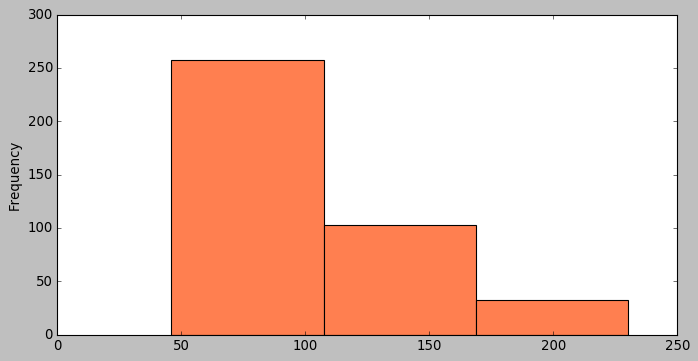

In [26]:
# horsepower histogram
plt.style.use('classic')
df['horsepower'].plot(kind='hist',bins=3,color='coral',figsize=(10,5))
plt.show()

In [27]:
# 구간의 경계값 구하기 = Numpy.histogram(df['columnName'],bins=N)
count, bin_dividers=np.histogram(df['horsepower'],bins=3)
bin_dividers

array([ 46.        , 107.33333333, 168.66666667, 230.        ])

In [28]:
# 구간분할 
bin_names=['저출력','보통출력','고출력']
# cut()함수의 옵션설정
df['hp_bin']=pd.cut(x=df['horsepower'], # 데이터 배열
                   bins=bin_dividers, # 경계값 리스트 
                   labels=bin_names, # bin 이름
                   include_lowest=True) # 첫 경계값(구간분할 시작점 포함)
print(df[['horsepower','hp_bin']].head(15))

    horsepower hp_bin
0        130.0   보통출력
1        165.0   보통출력
2        150.0   보통출력
3        150.0   보통출력
4        140.0   보통출력
5        198.0    고출력
6        220.0    고출력
7        215.0    고출력
8        225.0    고출력
9        190.0    고출력
10       170.0    고출력
11       160.0   보통출력
12       150.0   보통출력
13       225.0    고출력
14        95.0    저출력


### 4-2. 더미 변수

In [29]:
# hp_bin 열의 범주형 데이터를 더미 변수로 변환
# 해당 범주에 어떤 특성이 있는지 없는지의 여부만을 표시한다. 
horsepower_dummies=pd.get_dummies(df['hp_bin'])

horsepower_dummies.head(15)

# 원핫인코딩은 여기서 끝났음 > 해당값을

hp_bin,저출력,보통출력,고출력
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,0,1


### Onehot-Encoder

In [30]:
# 전처리를 위한 encoder 객체 만들기 > 원핫인코딩 객체생성
label_encoder=preprocessing.LabelEncoder()
onehot_encoder=preprocessing.OneHotEncoder()

# label encoder로 문자열 범주를 숫자형 범주로 변환 > 원핫인코딩에 해당하는 세개의 카테고리를 만들어 버렸음
onehot_labeled=label_encoder.fit_transform(df['hp_bin'].head(15))
print(onehot_labeled)
print(type(onehot_labeled))

[1 1 1 1 1 0 0 0 0 0 0 1 1 0 2]
<class 'numpy.ndarray'>


In [31]:
print(onehot_encoder)

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)


In [32]:
# 2차원 행렬로 형태 변경 : 행렬연산을 위해서 2차원으로 변환 
onehot_reshaped=onehot_labeled.reshape(len(onehot_labeled),1)
print(onehot_reshaped)
print(type(onehot_reshaped))

[[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [2]]
<class 'numpy.ndarray'>


In [33]:
#희소 행렬로 변환
onehot_fitted=onehot_encoder.fit_transform(onehot_reshaped)

C:\ProgramData\Anaconda3\envs\rowena\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [34]:
print(onehot_fitted)
print(type(onehot_fitted))

  (0, 1)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (3, 1)	1.0
  (4, 1)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 1)	1.0
  (12, 1)	1.0
  (13, 0)	1.0
  (14, 2)	1.0
<class 'scipy.sparse.csr.csr_matrix'>


## 5. 정규화
- 숫자 데이터의 상대적인 크기 차이를 제거하기위해 각 열(변수)에 속하는 데이터값을 동일한 크기 기준으로 나눈 비율로 나타내는 것
- 각 열의 데이터를 해당 열의 최대값으로 나누는 방법 -> 정규화 과정을 거친 데이터의 범위는 0 ~ 1 또는 -1 ~ 1

- 교수님네 학생이 시험을 봤을때 60점 밑인 학생들이 많으면 다 F줘야 되므로 성적을 공평하게 주기 위해서 점수를 성적기준에 맞게 재 분류하는 작업

In [35]:
df=pd.read_csv('./auto-mpg.csv',header=None)
df.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

In [36]:
# 정규화 (1) - 각 열의 데이터를 해당 열의 최대값으로 나누는 방법

# horsepower열의 누락데이터(?)를 삭제하고 실수형으로 변환
df['horsepower'].replace('?',np.nan, inplace=True)
df.dropna(subset=['horsepower'],axis=0,inplace=True)
df['horsepower']=df['horsepower'].astype('float')

# horsepower열의 통계요약정보로 최대값 확인
print(df.horsepower.describe(),'\n')

# horsepower열의 최대값의 절대값으로 모든 데이터를 나눠서 저장
df.horsepower=df.horsepower/abs(df.horsepower.max())
print(df.horsepower.head(),'\n')
print(df.horsepower.describe())

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64 

0    0.565217
1    0.717391
2    0.652174
3    0.652174
4    0.608696
Name: horsepower, dtype: float64 

count    392.000000
mean       0.454215
std        0.167353
min        0.200000
25%        0.326087
50%        0.406522
75%        0.547826
max        1.000000
Name: horsepower, dtype: float64


In [37]:

# 정규화 (2) - 각 열의 데이터 중에서 최대값과 최소값을 뺀 값으로 나누는 방법 -> 가장 큰 값은 역시 1

# 통계요약정보로 최소값 확인
print(df.horsepower.describe(),'\n')

# horsepower열의 최대값의 절대값으로 모든 데이터를 나눠서 저장
min_x=df.horsepower - df.horsepower.min()
min_max=df.horsepower.max() - df.horsepower.min()
df.horsepower = min_x/min_max

# 정규화 (2) 결과출력 
print(df.horsepower.head(),'\n')
print(df.horsepower.describe())

count    392.000000
mean       0.454215
std        0.167353
min        0.200000
25%        0.326087
50%        0.406522
75%        0.547826
max        1.000000
Name: horsepower, dtype: float64 

0    0.456522
1    0.646739
2    0.565217
3    0.565217
4    0.510870
Name: horsepower, dtype: float64 

count    392.000000
mean       0.317768
std        0.209191
min        0.000000
25%        0.157609
50%        0.258152
75%        0.434783
max        1.000000
Name: horsepower, dtype: float64


## 6. 시계열 데이터

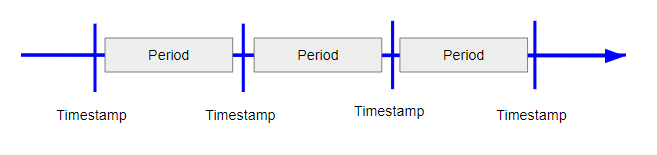

In [38]:
df=pd.read_csv('stock-data.csv')
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
Date      20 non-null object
Close     20 non-null int64
Start     20 non-null int64
High      20 non-null int64
Low       20 non-null int64
Volume    20 non-null int64
dtypes: int64(5), object(1)
memory usage: 1.1+ KB
None


,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039
5,2018-06-25,11150,11400,11450,11000,55519
6,2018-06-22,11300,11250,11450,10750,134805
7,2018-06-21,11200,11350,11750,11200,133002
8,2018-06-20,11550,11200,11600,10900,308596
9,2018-06-19,11300,11850,11950,11300,180656


### 6-1. 다른 자료형을 시계열 객체로 변환

- 문자열을 Timestamp로 변환 (문자열 > datetime64)

In [39]:
# 문자열 데이터를 timestamp로 변환
df['new_Date']=pd.to_datetime(df['Date'])
# 데이터 내용 및 자료형 확인
print(df.head(),'\n')
print(df.info(),'\n')
print(type(df['new_Date'][0]))

         Date  Close  Start   High    Low  Volume   new_Date
0  2018-07-02  10100  10850  10900  10000  137977 2018-07-02
1  2018-06-29  10700  10550  10900   9990  170253 2018-06-29
2  2018-06-28  10400  10900  10950  10150  155769 2018-06-28
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27
4  2018-06-26  10800  10900  11000  10700   63039 2018-06-26 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
Date        20 non-null object
Close       20 non-null int64
Start       20 non-null int64
High        20 non-null int64
Low         20 non-null int64
Volume      20 non-null int64
new_Date    20 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB
None 

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [40]:
# 시계열 값으로 변환된 열을 새로운 행 인덱스로 지정.
df.set_index('new_Date',inplace=True)
df.drop('Date',axis=1,inplace=True) # 기존 날짜 열 삭제 (drop)
# 데이터 내용 및 자료형 확인
print(df.head(),'\n')
print(df.info())

            Close  Start   High    Low  Volume
new_Date                                      
2018-07-02  10100  10850  10900  10000  137977
2018-06-29  10700  10550  10900   9990  170253
2018-06-28  10400  10900  10950  10150  155769
2018-06-27  10900  10800  11050  10500  133548
2018-06-26  10800  10900  11000  10700   63039 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2018-07-02 to 2018-06-01
Data columns (total 5 columns):
Close     20 non-null int64
Start     20 non-null int64
High      20 non-null int64
Low       20 non-null int64
Volume    20 non-null int64
dtypes: int64(5)
memory usage: 960.0 bytes
None


#### Timestamp를 Period로 변환
- to_period()함수를 이용하면 일정한 기간을 나타내는 Period객체로 Timestamp객체를 변환할 수 있다. 
- freq옵션에 기준이 되는 기간을 설정한다. 

In [41]:
dates=['2019-01-01','2020-03-01','2021-06-01']
# 분기별 결산, 분기별 통계량 계산을 위해 period 사용
ts_dates=pd.to_datetime(dates)
print(ts_dates)
pr_day=ts_dates.to_period(freq='D')
print(pr_day)
pr_month=ts_dates.to_period(freq='M')
print(pr_month)
pr_year=ts_dates.to_period(freq='A')
print(pr_year)

DatetimeIndex(['2019-01-01', '2020-03-01', '2021-06-01'], dtype='datetime64[ns]', freq=None)
PeriodIndex(['2019-01-01', '2020-03-01', '2021-06-01'], dtype='period[D]', freq='D')
PeriodIndex(['2019-01', '2020-03', '2021-06'], dtype='period[M]', freq='M')
PeriodIndex(['2019', '2020', '2021'], dtype='period[A-DEC]', freq='A-DEC')


### 6-2. 시계열 데이터 만들기 (순서가 있는 데이터 - )
#### Timestamp 배열
- pandas.date_range(start=None, end=None, periods=None, freq=None, tz=None, normalize=False, name=None, closed=None, **kwargs**)
- [https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html?highlight=date_range#pandas.date_range]
- 여러개의 날짜가 들어있는 배열 형태의 시계열 데이터 만들기

#### Period 배열
- pandas.period_range(start=None, end=None, periods=None, freq=None, name=None)
- [https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.period_range.html?highlight=period_range#pandas.period_range]
- 여러개의 기간이 들어있는 시계열 데이터 만들기

In [42]:
# timestamp의 배열 만들기 - 월간격, 월의 시작일 기준
ts_ms=pd.date_range(start='2019-01-01', # 날짜범위 시작
                   end=None,           # 날짜범위 끝
                   periods=6,          # timestamp 생성 갯수
                   freq='MS',          # 시간 간격 (MS : 월의 시작일)
                   tz='Asia/Seoul')    # Time Zone
print(ts_ms)

DatetimeIndex(['2019-01-01 00:00:00+09:00', '2019-02-01 00:00:00+09:00',
               '2019-03-01 00:00:00+09:00', '2019-04-01 00:00:00+09:00',
               '2019-05-01 00:00:00+09:00', '2019-06-01 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='MS')


In [43]:
ts_me=pd.date_range('2019-01-01',periods=6,freq='M',tz='Asia/Seoul') # 'M' 월의 마지막 날
print(ts_me,'\n')
ts_3m=pd.date_range('2019-01-01',periods=6,freq='3M',tz='Asia/Seoul') # '3M' 3개월 간격의 마지막 날짜
print(ts_3m)

DatetimeIndex(['2019-01-31 00:00:00+09:00', '2019-02-28 00:00:00+09:00',
               '2019-03-31 00:00:00+09:00', '2019-04-30 00:00:00+09:00',
               '2019-05-31 00:00:00+09:00', '2019-06-30 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='M') 

DatetimeIndex(['2019-01-31 00:00:00+09:00', '2019-04-30 00:00:00+09:00',
               '2019-07-31 00:00:00+09:00', '2019-10-31 00:00:00+09:00',
               '2020-01-31 00:00:00+09:00', '2020-04-30 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='3M')


In [44]:
# period배열 만들기
pr_m=pd.period_range(start='2019-01-01', # 날짜범위 시작
                     end=None,          # 날짜 범위 끝
                     periods=3,         # 생성할 period 갯수
                     freq='M')          # 기간의 길이 (M:월)
print(pr_m)

PeriodIndex(['2019-01', '2019-02', '2019-03'], dtype='period[M]', freq='M')


In [45]:
pr_h=pd.period_range(start='2019-01-01',end=None,periods=3,freq='H') # 'H' - 1시간 간격
print(pr_h,'\n')
pr_2h=pd.period_range(start='2019-01-01',end=None,periods=3,freq='2H')
print(pr_2h)

PeriodIndex(['2019-01-01 00:00', '2019-01-01 01:00', '2019-01-01 02:00'], dtype='period[H]', freq='H') 

PeriodIndex(['2019-01-01 00:00', '2019-01-01 02:00', '2019-01-01 04:00'], dtype='period[2H]', freq='2H')


### 6-3. 시계열 데이터 활용
- 날짜 데이터 분리

In [46]:
# 본문 'date'를 datetime속성으로 변경
df=pd.read_csv('stock-data.csv')
df['new_Date']=pd.to_datetime(df['Date'])
print(df.info())
print(df.head(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
Date        20 non-null object
Close       20 non-null int64
Start       20 non-null int64
High        20 non-null int64
Low         20 non-null int64
Volume      20 non-null int64
new_Date    20 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB
None
         Date  Close  Start   High    Low  Volume   new_Date
0  2018-07-02  10100  10850  10900  10000  137977 2018-07-02
1  2018-06-29  10700  10550  10900   9990  170253 2018-06-29
2  2018-06-28  10400  10900  10950  10150  155769 2018-06-28
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27
4  2018-06-26  10800  10900  11000  10700   63039 2018-06-26 



In [47]:
# dt 속성을 이용하여 new_Date열의 연-월-일 정보 구분
df['Year']=df['new_Date'].dt.year
df['Month']=df['new_Date'].dt.month
df['Day']=df['new_Date'].dt.day
print(df.head())

         Date  Close  Start   High    Low  Volume   new_Date  Year  Month  Day
0  2018-07-02  10100  10850  10900  10000  137977 2018-07-02  2018      7    2
1  2018-06-29  10700  10550  10900   9990  170253 2018-06-29  2018      6   29
2  2018-06-28  10400  10900  10950  10150  155769 2018-06-28  2018      6   28
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27  2018      6   27
4  2018-06-26  10800  10900  11000  10700   63039 2018-06-26  2018      6   26


In [48]:
# timestamp객체를 period객체로 변환 (to_period())
df['Date_yr']=df['new_Date'].dt.to_period(freq='A') # year end / 연도값
df['Date_m']=df['new_Date'].dt.to_period(freq='M') # month end / 연-월
print(df.head())

         Date  Close  Start   High    Low  Volume   new_Date  Year  Month  \
0  2018-07-02  10100  10850  10900  10000  137977 2018-07-02  2018      7   
1  2018-06-29  10700  10550  10900   9990  170253 2018-06-29  2018      6   
2  2018-06-28  10400  10900  10950  10150  155769 2018-06-28  2018      6   
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27  2018      6   
4  2018-06-26  10800  10900  11000  10700   63039 2018-06-26  2018      6   

   Day Date_yr   Date_m  
0    2    2018  2018-07  
1   29    2018  2018-06  
2   28    2018  2018-06  
3   27    2018  2018-06  
4   26    2018  2018-06  


In [49]:
# 추출한 날짜 정보를 데이터프레임의 행 인덱스로 지정 'Date_m'
df.set_index('Date_m',inplace=True)
print(df.head())

               Date  Close  Start   High    Low  Volume   new_Date  Year  \
Date_m                                                                     
2018-07  2018-07-02  10100  10850  10900  10000  137977 2018-07-02  2018   
2018-06  2018-06-29  10700  10550  10900   9990  170253 2018-06-29  2018   
2018-06  2018-06-28  10400  10900  10950  10150  155769 2018-06-28  2018   
2018-06  2018-06-27  10900  10800  11050  10500  133548 2018-06-27  2018   
2018-06  2018-06-26  10800  10900  11000  10700   63039 2018-06-26  2018   

         Month  Day Date_yr  
Date_m                       
2018-07      7    2    2018  
2018-06      6   29    2018  
2018-06      6   28    2018  
2018-06      6   27    2018  
2018-06      6   26    2018  


#### 날짜 인덱스 활용
- Timestamp > DatetimeIndex
- Period > PeriodIndex

- 날짜 인덱스 사용 : 연-월-일 중 내가 필요로 하는 레벨을 선택적으로 인덱싱 가능
- 날짜 범위로 슬라이싱 추출 가능

In [50]:
df['new_Date']=pd.to_datetime(df['Date'])
df.set_index('new_Date',inplace=True)
print(df.head(),'\n')
print(df.index)

                  Date  Close  Start   High    Low  Volume  Year  Month  Day  \
new_Date                                                                       
2018-07-02  2018-07-02  10100  10850  10900  10000  137977  2018      7    2   
2018-06-29  2018-06-29  10700  10550  10900   9990  170253  2018      6   29   
2018-06-28  2018-06-28  10400  10900  10950  10150  155769  2018      6   28   
2018-06-27  2018-06-27  10900  10800  11050  10500  133548  2018      6   27   
2018-06-26  2018-06-26  10800  10900  11000  10700   63039  2018      6   26   

           Date_yr  
new_Date            
2018-07-02    2018  
2018-06-29    2018  
2018-06-28    2018  
2018-06-27    2018  
2018-06-26    2018   

DatetimeIndex(['2018-07-02', '2018-06-29', '2018-06-28', '2018-06-27',
               '2018-06-26', '2018-06-25', '2018-06-22', '2018-06-21',
               '2018-06-20', '2018-06-19', '2018-06-18', '2018-06-15',
               '2018-06-14', '2018-06-12', '2018-06-11', '2018-06-08',
      

In [51]:
# 날짜 인덱스를 이용하여 데이터 선택
df_y=df['2018']
print(df_y.head(),'\n')
df_ym=df.loc['2018-07'] # loc인덱서 활용
print(df_ym,'\n')
df_ym_cols=df.loc['2018-07','Start':'High'] # 열 범위 슬라이싱
print(df_ym_cols,'\n')
df_ymd=df['2018-07-02']
print(df_ymd,'\n')
df_ymd_range=df['2018-06-25':'2018-06-20'] # 날짜 범위 지정
print(df_ymd_range)

                  Date  Close  Start   High    Low  Volume  Year  Month  Day  \
new_Date                                                                       
2018-07-02  2018-07-02  10100  10850  10900  10000  137977  2018      7    2   
2018-06-29  2018-06-29  10700  10550  10900   9990  170253  2018      6   29   
2018-06-28  2018-06-28  10400  10900  10950  10150  155769  2018      6   28   
2018-06-27  2018-06-27  10900  10800  11050  10500  133548  2018      6   27   
2018-06-26  2018-06-26  10800  10900  11000  10700   63039  2018      6   26   

           Date_yr  
new_Date            
2018-07-02    2018  
2018-06-29    2018  
2018-06-28    2018  
2018-06-27    2018  
2018-06-26    2018   

                  Date  Close  Start   High    Low  Volume  Year  Month  Day  \
new_Date                                                                       
2018-07-02  2018-07-02  10100  10850  10900  10000  137977  2018      7    2   

           Date_yr  
new_Date            
2018-07